<a href="https://colab.research.google.com/github/clay-lu/portfolio/blob/main/WOW_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WOW PROJECT**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from datetime import datetime
import scipy.stats as ss
from scipy.stats.mstats import winsorize

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# XGBoost & LightGBM
!pip install lightgbm
from xgboost import XGBRegressor
import lightgbm as lgb

# Wordcloud & nltk
!pip install wordcloud
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS


In [ ]:
bodyfat_df = pd.read_csv('/content/bodyfat.csv')
bodyfat_df.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
bodyfat_df.shape

(252, 15)

In [ ]:
bodyfat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
bodyfat_df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
duplicate_rows = bodyfat_df[bodyfat_df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found")

if not duplicate_rows.empty:
    bodyfat_df.drop_duplicates(inplace=True)
    print("Duplicate rows dropped")
else:
    print("No duplicate rows were dropped")

No duplicate rows found
No duplicate rows were dropped


In [ ]:
bodyfat_df.dropna(inplace=True)

In [ ]:
# Convert height from inches to meters
bodyfat_df['Height_m'] = bodyfat_df['Height'] * 0.0254  # 1 inch = 0.0254 meters

# Convert weight from lbs to kg
bodyfat_df['Weight_kg'] = bodyfat_df['Weight'] * 0.453592  # 1 lb = 0.453592 kg

# Calculate BMI
bodyfat_df['BMI'] = bodyfat_df['Weight_kg'] / (bodyfat_df['Height_m'] ** 2)

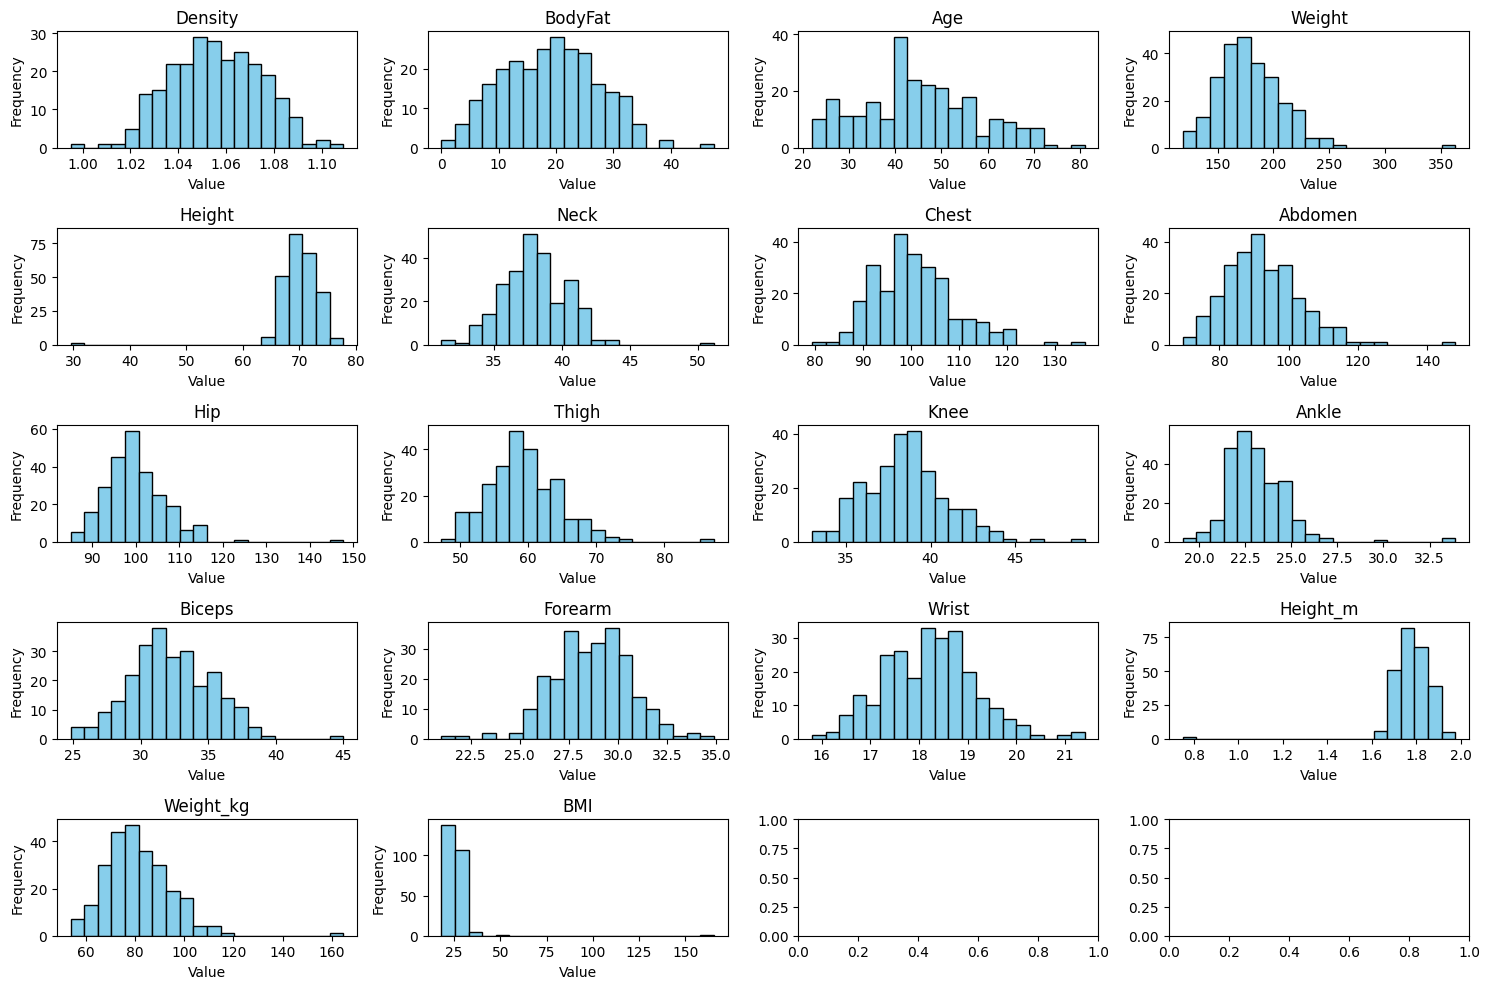

In [ ]:
num_columns = len(bodyfat_df.columns)
num_rows = (num_columns // 4) + 1

fig, axes = plt.subplots(num_rows, 4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(bodyfat_df.columns):
    ax = axes[i]
    ax.hist(bodyfat_df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

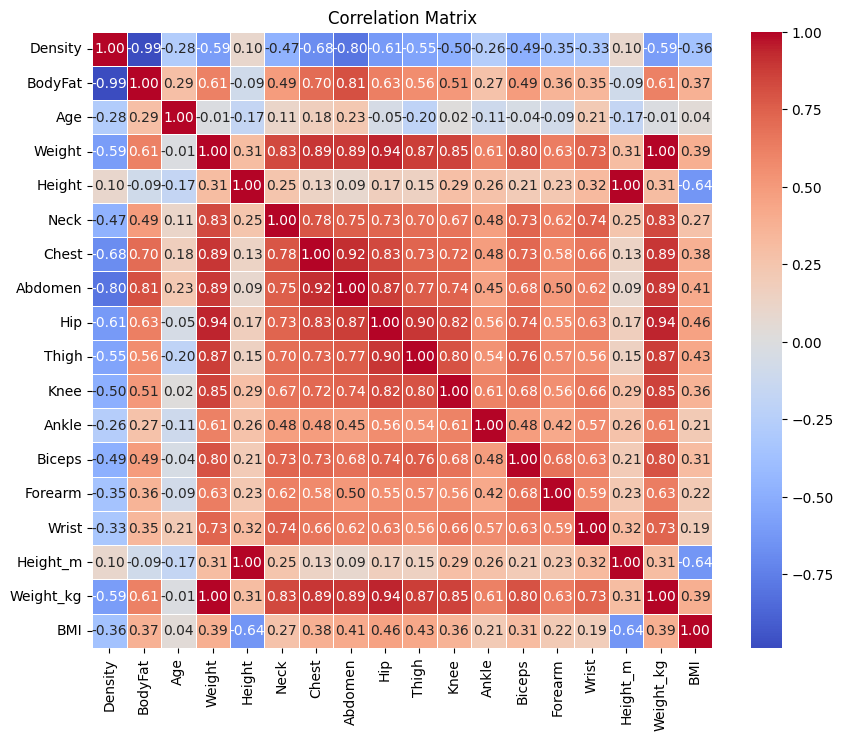

In [ ]:
corr_matrix = bodyfat_df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Random forest

In [ ]:
X = bodyfat_df.drop(['BodyFat'], axis=1)
y = bodyfat_df['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Reset index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Check the size of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((201, 17), (51, 17), (201,), (51,))

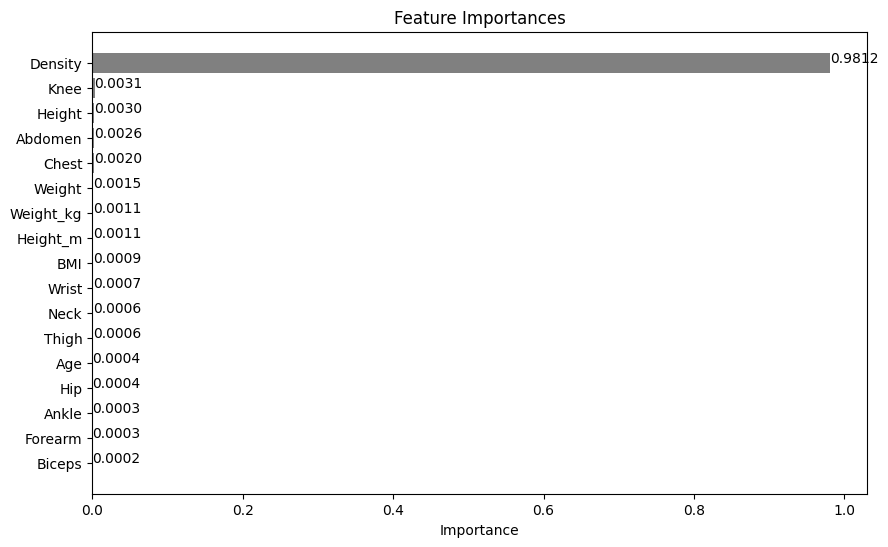

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled and y_train are defined and prepared elsewhere in your code
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, np.ravel(y_train))

# Get the feature importances from the model
importances = model.feature_importances_

# Sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]




# Create a dataframe to hold feature names and their importance scores
features = [X_train.columns[i] for i in indices]
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances[indices]})

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='grey', align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top

# Annotate the bars with the actual importance values
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}')

plt.show()





# # Create a plot
# plt.figure(figsize=(10, 6))
# plt.title('Feature Importances')

# # Create bar plot
# bars = plt.bar(range(X_train_scaled.shape[1]), importances[indices], color='r', align='center')

# # Add labels and title
# plt.xticks(range(X_train_scaled.shape[1]), X.columns[indices], rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('Importance')

# # Annotate the bars with the actual importance values
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')  # va: vertical alignment
# i

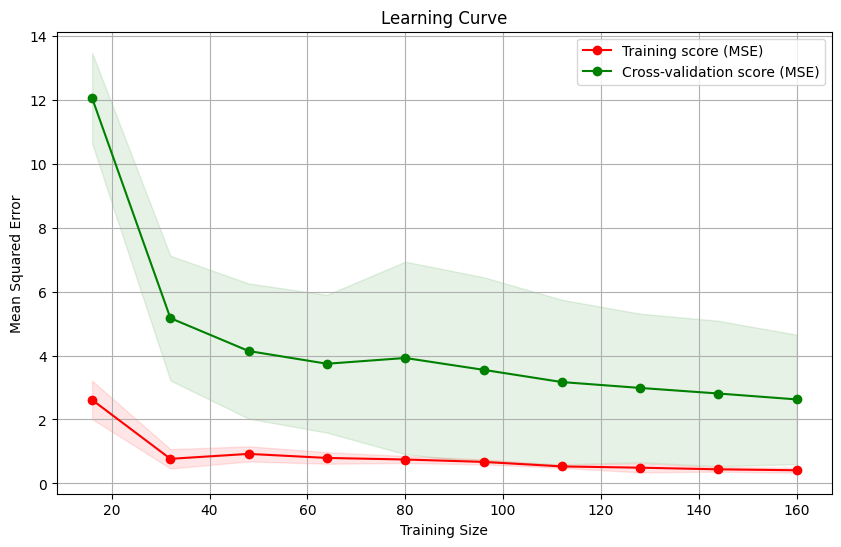

Feature Ranking:  [ 1  5  9  4  8  2  1  6  7  1 12 11 10  1  1  1  3]
Selected Features: Index(['Density', 'Abdomen', 'Knee', 'Wrist', 'Height_m', 'Weight_kg'], dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

# Assuming X_train and y_train are defined and y_train is continuous

# Train the random forest regressor model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = -np.mean(train_scores, axis=1)  # Since scores are negative MSE, convert them to MSE by negating
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score (MSE)")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score (MSE)")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Assuming X_train and y_train are defined
# Create the RFE object and rank each feature
selector = RFE(model, n_features_to_select=6)  # You can change n_features_to_select based on your preference
selector = selector.fit(X_train, y_train)

# Print the ranking of features
print("Feature Ranking: ", selector.ranking_)

# To see which features are selected as the most important:
selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features)

#**Causal Analysis**

In [ ]:
!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 16.0 MB/s eta 0:00:00


In [ ]:
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from econml.inference import StatsModelsInference

# Defining features and target
X = bodyfat_df.drop(['BodyFat', 'Density'], axis=1)
y = bodyfat_df['BodyFat']
T = bodyfat_df['Density']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model.fit(y, T, X=X, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate = model.ate(X)
ate_confidence_interval = model.ate_interval(X, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for Density:", ate_estimate)
print("95% Confidence Interval:", ate_confidence_interval)


ATE Estimate for Density: -402.9188121830505
95% Confidence Interval: (-423.86272858465804, -381.9748957814429)


Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
# Defining features and target
X = bodyfat_df.drop(['BodyFat', 'Knee'], axis=1)
y = bodyfat_df['BodyFat']
T = bodyfat_df['Knee']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model.fit(y, T, X=X, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate = model.ate(X)
ate_confidence_interval = model.ate_interval(X, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for Knee:", ate_estimate)
print("95% Confidence Interval:", ate_confidence_interval)


ATE Estimate for Knee: -0.06204001222580313
95% Confidence Interval: (-0.22766920693570303, 0.10358918248409682)


Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
# Defining features and target
X = bodyfat_df.drop(['BodyFat', 'Abdomen'], axis=1)
y = bodyfat_df['BodyFat']
T = bodyfat_df['Abdomen']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model.fit(y, T, X=X, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate = model.ate(X)
ate_confidence_interval = model.ate_interval(X, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for Abdomen:", ate_estimate)
print("95% Confidence Interval:", ate_confidence_interval)


ATE Estimate for Abdomen: 0.03383162010221922
95% Confidence Interval: (-0.016550405169442894, 0.08421364537388162)


Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
# Defining features and target
X = bodyfat_df.drop(['BodyFat', 'Weight'], axis=1)
y = bodyfat_df['BodyFat']
T = bodyfat_df['Weight']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model.fit(y, T, X=X, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate = model.ate(X)
ate_confidence_interval = model.ate_interval(X, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for Weight:", ate_estimate)
print("95% Confidence Interval:", ate_confidence_interval)

ATE Estimate for Weight: -0.05700345896169561
95% Confidence Interval: (-0.47840842987735716, 0.3644015119539693)


Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
# Defining features and target
X = bodyfat_df.drop(['BodyFat', 'Height'], axis=1)
y = bodyfat_df['BodyFat']
T = bodyfat_df['Height']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model.fit(y, T, X=X, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate = model.ate(X)
ate_confidence_interval = model.ate_interval(X, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for Height:", ate_estimate)
print("95% Confidence Interval:", ate_confidence_interval)

ATE Estimate for Height: -0.8005226200557249
95% Confidence Interval: (-4.752550394883598, 3.1515051547721478)


Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
# Defining features and target
X = bodyfat_df.drop(['BodyFat', 'Neck'], axis=1)
y = bodyfat_df['BodyFat']
T = bodyfat_df['Neck']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model.fit(y, T, X=X, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate = model.ate(X)
ate_confidence_interval = model.ate_interval(X, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for Neck:", ate_estimate)
print("95% Confidence Interval:", ate_confidence_interval)

ATE Estimate for Neck: -0.04097461493462121
95% Confidence Interval: (-0.16416484461701278, 0.08221561474777031)


Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
# Defining features and target
X = bodyfat_df.drop(['BodyFat', 'Chest'], axis=1)
y = bodyfat_df['BodyFat']
T = bodyfat_df['Chest']  # Treatment assignment

# Split the data into training and testing sets for better generalization
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.2, random_state=123)

# Initialize the model with Gradient Boosting for the outcome and treatment models
# and specify Linear Regression for the final stage of estimation.
model = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(), random_state=123, cv = 6)

# Fit the model
model.fit(y, T, X=X, inference='statsmodels')

# Obtain the ATE estimate and its 95% confidence interval
ate_estimate = model.ate(X)
ate_confidence_interval = model.ate_interval(X, alpha=0.05)

# Print the ATE and confidence interval
print("ATE Estimate for Chest:", ate_estimate)
print("95% Confidence Interval:", ate_confidence_interval)

ATE Estimate for Chest: 0.017646820245520382
95% Confidence Interval: (-0.042609495482112444, 0.07790313597315346)


Co-variance matrix is underdetermined. Inference will be invalid!


| Feature                        | ATE Estimate | 95% Confidence Interval    |
|--------------------------------|--------------|----------------------------|
| Denstiy                 | -416.2871579646432        | [-429.7992810315116, -402.7750348977748]             |
| Knee | -0.03890480101235389      | [-0.2168611815887812, 0.13905157956407388]           |
| Abdomen   | 0.018361776497346917        | [-0.02469692171002244, 0.06142047470471626]            |
| Weight                     | 0.026381270394408043        | [-0.01191390535929359, 0.06467644614810956]           |
| Height      | 0.011537202558714509       | [-0.08329667788558555, 0.10637108300301518]           |
| Neck                   | -0.019632639789858807       | [-0.11752673609056524, 0.07826145651084815]           |
| Chest                           | 0.023004312776834363       | [-0.03844015492737115, 0.08444878048103971]           |

Classifiers


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Min-max scaler will not be used here based upon the assumption that all of the features are unbounded above.
# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
#mms = MinMaxScaler()
#X_train_norm = mms.fit_transform(X_train)
#X_test_norm = mms.transform(X_test)
#print(X_train_norm)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()  #we fit the StandardScaler class only once—on the training data—and use those parameters to transform the test dataset or any new data point.
X_train_std = pd.DataFrame(stdsc.fit_transform(X_train))
X_test_std = pd.DataFrame(stdsc.transform(X_test))

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Convert 'BodyFat' into categorical classes
bins = [0, 15, 25, 100]  # adjust the thresholds as suitable
labels = ['Low', 'Medium', 'High']
bodyfat_df['BodyFatCategory'] = pd.cut(bodyfat_df['BodyFat'], bins=bins, labels=labels, include_lowest=True)

#Convert 'BodyFat' into categorical classes
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
bodyfat_df['BodyFatCategory'] = label_encoder.fit_transform(bodyfat_df['BodyFatCategory'])

# Show the encoded labels

bodyfat_df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Height_m,Weight_kg,BMI,BodyFatCategory
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.72085,69.966566,23.626779,1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.83515,78.584814,23.334338,1
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.68275,69.853168,24.668737,0
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.83515,83.801122,24.883227,1
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.80975,83.574326,25.517358,0


##*Outliers & Skewness*

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
# define kNN imputer
imputer = KNNImputer()
# fit
imputer.fit(bodyfat_df)
# transform
bodyfat_df_inputed = pd.DataFrame(imputer.transform(bodyfat_df))

In [ ]:
X = bodyfat_df[['Age', 'Weight', 'Height', 'Neck', 'Abdomen']]
y = bodyfat_df['BodyFatCategory']

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):

    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')

    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series


    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True

        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))

        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply log transformation
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply exp transformation
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew

        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()


    return DF



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Age' . Skewness = 0.28


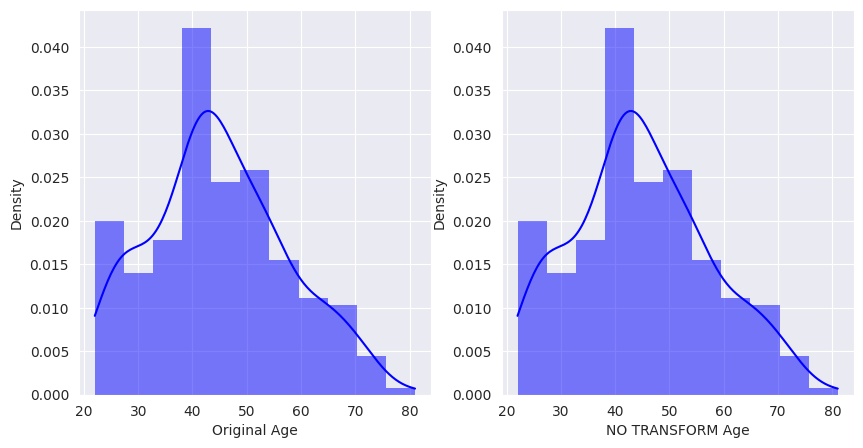


 ------------------------------------------------------

 'Weight' had 'positive' skewness of 1.21

 Transformation yielded skewness of -0.01


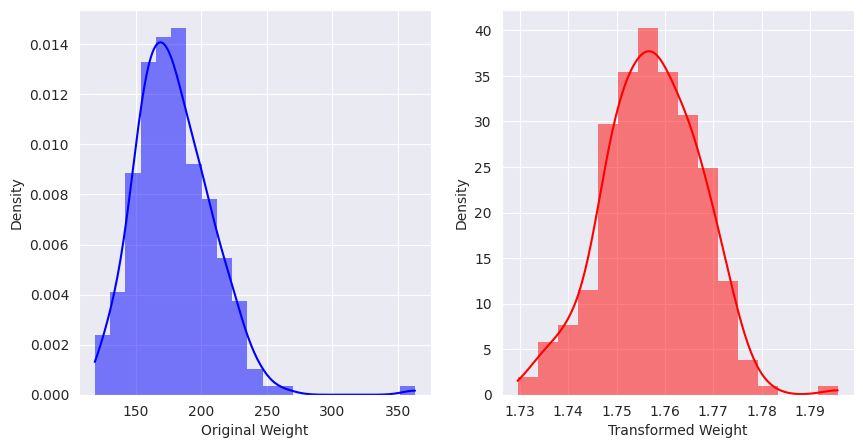


 ------------------------------------------------------

 'Height' had 'negative' skewness of -5.38

 Transformation yielded skewness of 0.16


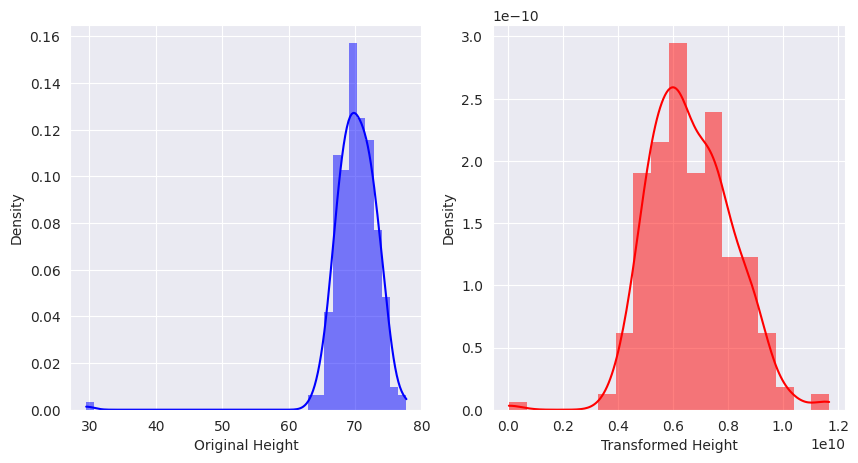


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Neck' . Skewness = 0.55


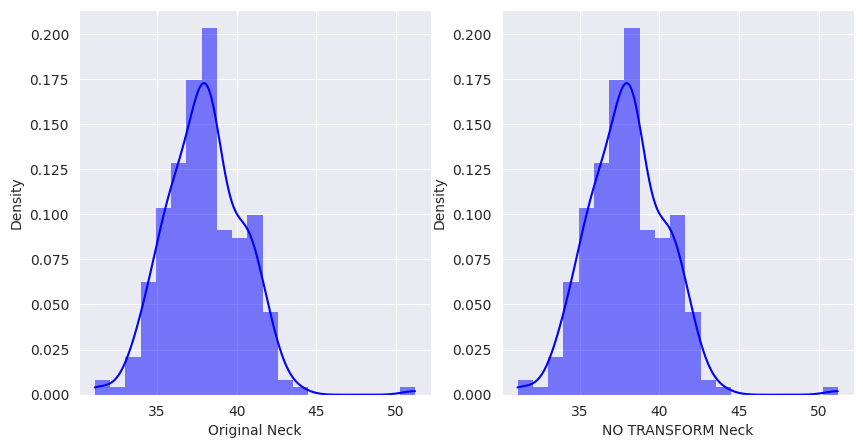


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Abdomen' . Skewness = 0.84


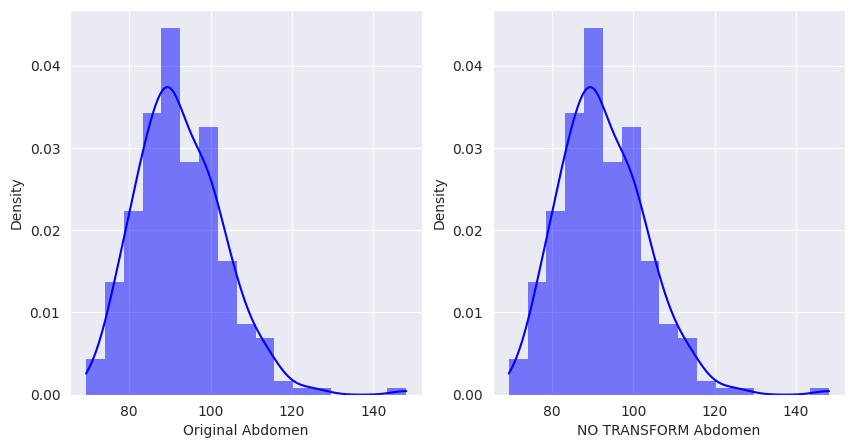

In [ ]:
X = skew_autotransform(X.copy(deep=True), plot = True, exp = False, threshold = 1)

#**Regressor Development**


In [ ]:
names = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVM','Decision Tree', 'Multilayer Perceptron','Random Forest', 'XGBoost', 'AdaBoost','LightGBM']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear', 'rbf' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(25,25,1),
                       max_iter = 1000,activation = 'relu',
                       solver = 'adam'),
              RandomForestRegressor(criterion='squared_error'),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(loss='square'),
              lgb.LGBMRegressor(objective='mean_squared_error')
              ]

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name)
  pipe = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', regr)])
  model = TransformedTargetRegressor(regressor=pipe, transformer=MinMaxScaler())
  cv = KFold(n_splits=10, shuffle=True, random_state=1)
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  score_mean = mean(absolute(scores))
  score_stdev = np.std(scores)
  print('Mean (std Dev) of MSE: %.3f (%.3f)\n' % (score_mean, score_stdev))

REGRESSOR:  Multiple Linear Regression
Mean (std Dev) of MSE: 0.569 (0.088)

REGRESSOR:  Lasso Regression
Mean (std Dev) of MSE: 0.651 (0.104)

REGRESSOR:  Ridge Regression
Mean (std Dev) of MSE: 0.568 (0.098)

REGRESSOR:  ElasticNet Regression
Mean (std Dev) of MSE: 0.651 (0.104)

REGRESSOR:  kNN
Mean (std Dev) of MSE: 0.564 (0.111)

REGRESSOR:  SVM
Mean (std Dev) of MSE: 0.855 (0.666)

REGRESSOR:  Decision Tree
Mean (std Dev) of MSE: 0.821 (0.190)

REGRESSOR:  Multilayer Perceptron
Mean (std Dev) of MSE: 0.877 (0.608)

REGRESSOR:  Random Forest
Mean (std Dev) of MSE: 0.488 (0.075)

REGRESSOR:  XGBoost
Mean (std Dev) of MSE: 0.603 (0.112)

REGRESSOR:  AdaBoost
Mean (std Dev) of MSE: 0.527 (0.105)

REGRESSOR:  LightGBM
Mean (std Dev) of MSE: 0.563 (0.106)



#**Gridsearch XGBoost Regressor**

In [ ]:
# Gridsearch the XGBoostRegressor hyperparameter space
model = XGBRegressor(objective ='reg:squarederror')
# define the grid of values to search
grid = dict()
grid['learning_rate']= [.05, 0.07]
grid['max_depth']= [7, 9]
grid['n_estimators'] = [400]
cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=192837465)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (absolute(mean), stdev, param))

Best: -0.667824 using {'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 400}
0.671911 (0.092501) with: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400}
0.678394 (0.089061) with: {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 400}
0.667824 (0.087225) with: {'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 400}
0.695612 (0.113260) with: {'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 400}


#**Sample Actual vs Predicted Graph**

In [ ]:
# Create holdout sample
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.25,    # 75-25 training vs test set split
                     random_state=0)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [ ]:
# Standardization z-score
stdsc1 = StandardScaler()
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
stdsc2 = StandardScaler()
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

In [ ]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
  print('MAPE: %.2f ' % mean_absolute_percentage_error(actuals,predictions))
  print('R^2: %.4f' % r2_score(actuals, predictions))

# Plotting the actuals vs predictions
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

MSE: 0.57 
MAPE: 686579456771608.62 
R^2: 0.0718


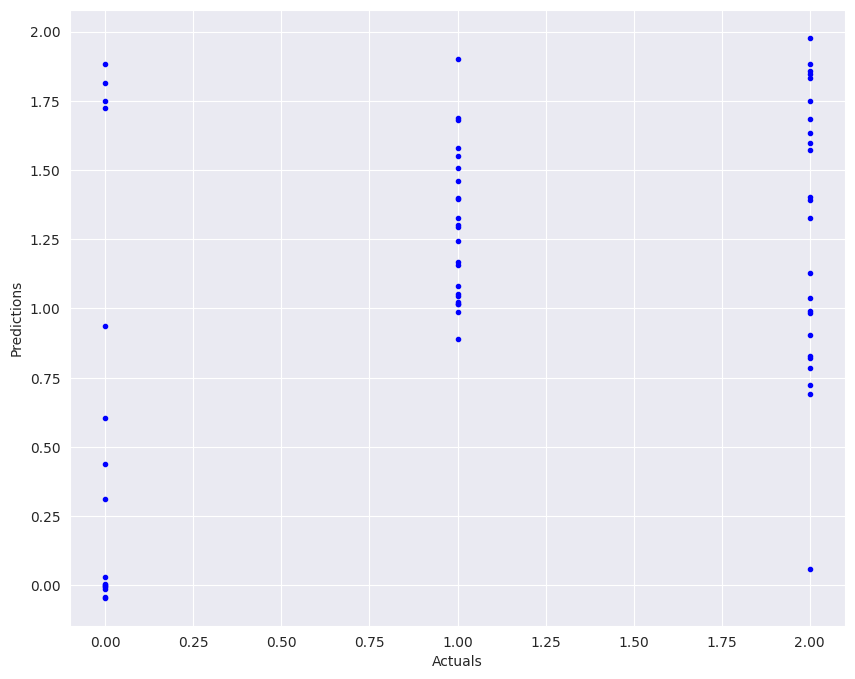

In [ ]:
#Fit XGBRegressor and produce graph and performance results for holdout sample
regr = XGBRegressor(objective ='reg:squarederror',learning_rate=0.05,max_depth=7,n_estimators=400)
regr.fit(X_train_std, np.ravel(y_train_std))
# Make predictions
y_pred_std = regr.predict(X_test_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = stdsc2.inverse_transform(y_pred_std)
# Performance
plt.figure(figsize=(10,8))
Performance(y_test,y_pred)
PredsVsActuals(y_test,y_pred)


#**Learning Curves (With Cross Validation)**

In [ ]:
# Libraries
from sklearn.svm import SVR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import ShuffleSplit
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
# Specify training set size for all cross validation folds
train_size = 0.2 * len(X)

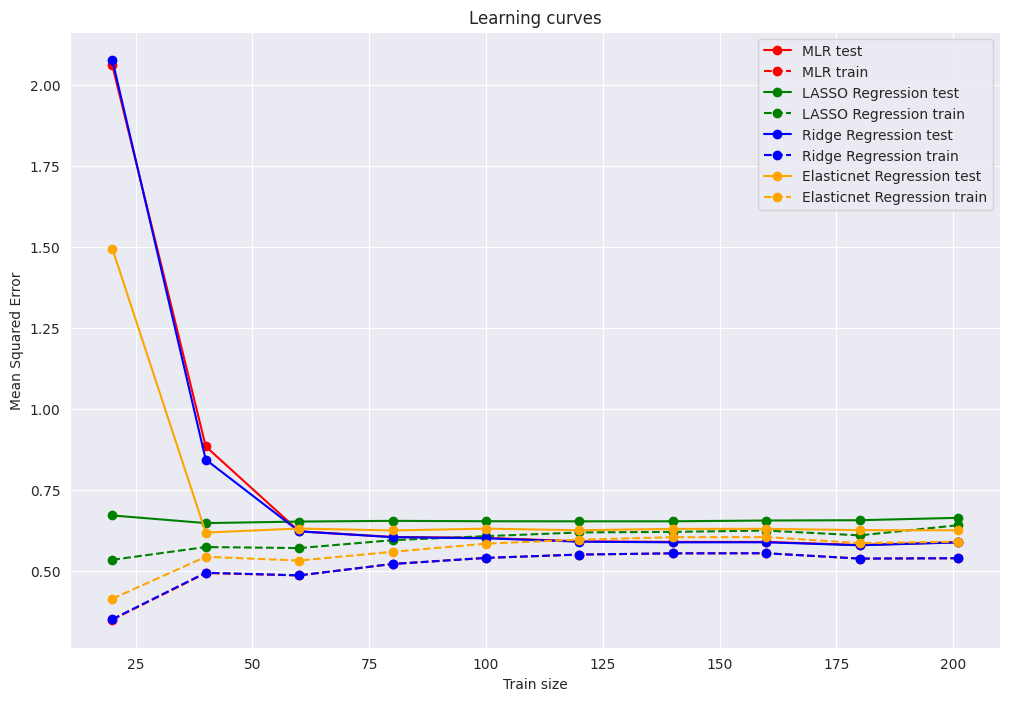

In [ ]:
# Learning Curves for multiple linear regerssion, LASSO regression, ridge regression, and elasticnet regression
MLR = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', linear_model.LinearRegression()]])

lasso = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor',Lasso(alpha=0.5)]])

ridge = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', Ridge(alpha=0.5)]])

elasticnet = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', ElasticNet(alpha=0.25, l1_ratio=0.5)]])

train_sizes, train_scores_MLR, test_scores_MLR = learning_curve(
    MLR,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)
train_sizes_abs, train_scores_lasso, test_scores_lasso = learning_curve(
    lasso,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)
train_sizes_abs, train_scores_ridge, test_scores_ridge = learning_curve(
    ridge,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)
train_sizes_abs, train_scores_elasticnet, test_scores_elasticnet = learning_curve(
    elasticnet,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)

# Figure size
plt.rcParams["figure.figsize"] = (12,8)
plt.figure()

plt.plot(train_sizes, -test_scores_MLR.mean(1), "o-", color="r", label="MLR test")
plt.plot(train_sizes, -train_scores_MLR.mean(1), "o--", color="r", label="MLR train")
plt.plot(train_sizes, -test_scores_lasso.mean(1), "o-", color="g", label="LASSO Regression test")
plt.plot(train_sizes, -train_scores_lasso.mean(1), "o--", color="g", label="LASSO Regression train")
plt.plot(train_sizes, -test_scores_ridge.mean(1), "o-", color="blue", label="Ridge Regression test")
plt.plot(train_sizes, -train_scores_ridge.mean(1), "o--", color="blue", label="Ridge Regression train")
plt.plot(train_sizes, -test_scores_elasticnet.mean(1), "o-", color="orange", label="Elasticnet Regression test")
plt.plot(train_sizes, -train_scores_elasticnet.mean(1), "o--", color="orange", label="Elasticnet Regression train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")
plt.show()



In [ ]:
# Select features and target
X = bodyfat_df[['Age', 'Weight', 'Height', 'Neck', 'Abdomen']]
y = bodyfat_df['BodyFatCategory']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define hyperparameters to tune
parameters = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(f'Best Parameters: {grid_search.best_params_}')


Accuracy: 78.43%
Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2'}



25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_

In [ ]:
# Adjusting bin thresholds based on the histogram you reviewed
bins = [0, 12, 24, 36, max(bodyfat_df['BodyFat'])]  # Example bins
labels = ['Low', 'Medium', 'High', 'Very High']  # Corresponding labels

# Apply the binning
bodyfat_df['BodyFatCategory'] = pd.cut(bodyfat_df['BodyFat'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of categories to ensure it's now multi-class
print(bodyfat_df['BodyFatCategory'].value_counts())



BodyFatCategory
Medium       119
High          73
Low           57
Very High      3
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('logreg', LogisticRegression())
])

# Define the parameter grid
param_grid = {
    'poly__degree': [1, 2, 3],
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

# Setup the grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Now fit the model
grid.fit(X_train, y_train)

# Print results
print("Best cross-validation accuracy: {:.2%}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: ", grid.best_params_)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Best cross-validation accuracy: 68.68%
Test set score: 0.75
Best parameters:  {'logreg__C': 1, 'logreg__penalty': 'l2', 'poly__degree': 1}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

# **The End**